In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model  import OLS
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [5]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [6]:
df= pd.read_csv("Car details.csv")
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sales_ID           7906 non-null   int64 
 1   name               7906 non-null   object
 2   year               7906 non-null   int64 
 3   selling_price      7906 non-null   int64 
 4   km_driven          7906 non-null   int64 
 5   Region             7906 non-null   object
 6   State or Province  7906 non-null   object
 7   City               7906 non-null   object
 8   fuel               7906 non-null   object
 9   seller_type        7906 non-null   object
 10  transmission       7906 non-null   object
 11  owner              7906 non-null   object
 12  mileage            7906 non-null   object
 13  engine             7906 non-null   object
 14  max_power          7906 non-null   object
 15  seats              7906 non-null   int64 
 16  sold               7906 non-null   object


In [6]:
df.head(2)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y


In [7]:
df.isnull().sum() # Checking for missing values

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
seats                0
sold                 0
dtype: int64

In [8]:
df.duplicated().sum() # Checking for duplicates

0

In [9]:
# splitting columns to extract numerical part of string

df['mileage']=df['mileage'].astype('str').str.split(expand=True)[0]
df['engine']=df['engine'].astype('str').str.split(expand=True)[0]
df['max_power']=df['max_power'].astype('str').str.split(expand=True)[0]

In [10]:
df.tail(2)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
7904,8127,Tata Indigo CR4,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First Owner,23.57,1396,70,5,N
7905,8128,Tata Indigo CR4,2013,290000,25000,East,Maine,Augusta,Diesel,Individual,Manual,First Owner,23.57,1396,70,5,N


In [11]:
# converting to correct data type

df['mileage']=df['mileage'].astype('float64')
df['engine']=df['engine'].astype('float64')
df['max_power']=df['max_power'].astype('float64')

In [12]:
df.head(2)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Y


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   float64
 14  max_power          7906 non-null   float64
 15  seats              7906 non-null   int64  
 16  sold               7906 

In [14]:
df.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'sold'],
      dtype='object')

In [15]:
num_cols= ['year','km_driven','mileage', 'engine', 'max_power', 'seats']
len(num_cols)

6

In [16]:
cat_cols= ['Region', 'State or Province', 'City', 'fuel', 'seller_type', 'transmission', 'owner']
len(cat_cols)

7

In [17]:
# Checking no: of sub-categories for each categorical columns
for i in cat_cols:
    print(i,":",df[i].nunique())

Region : 4
State or Province : 49
City : 1310
fuel : 4
seller_type : 3
transmission : 2
owner : 5


In [18]:
# Removing State & City columns from category list since they have high number of sub-categories

cat_cols= ['Region', 'fuel', 'seller_type', 'transmission', 'owner']
len(cat_cols)

5

In [19]:
# Checking no: of sub-categories for each categorical columns
for i in cat_cols:
    print(i,":",df[i].nunique())

Region : 4
fuel : 4
seller_type : 3
transmission : 2
owner : 5


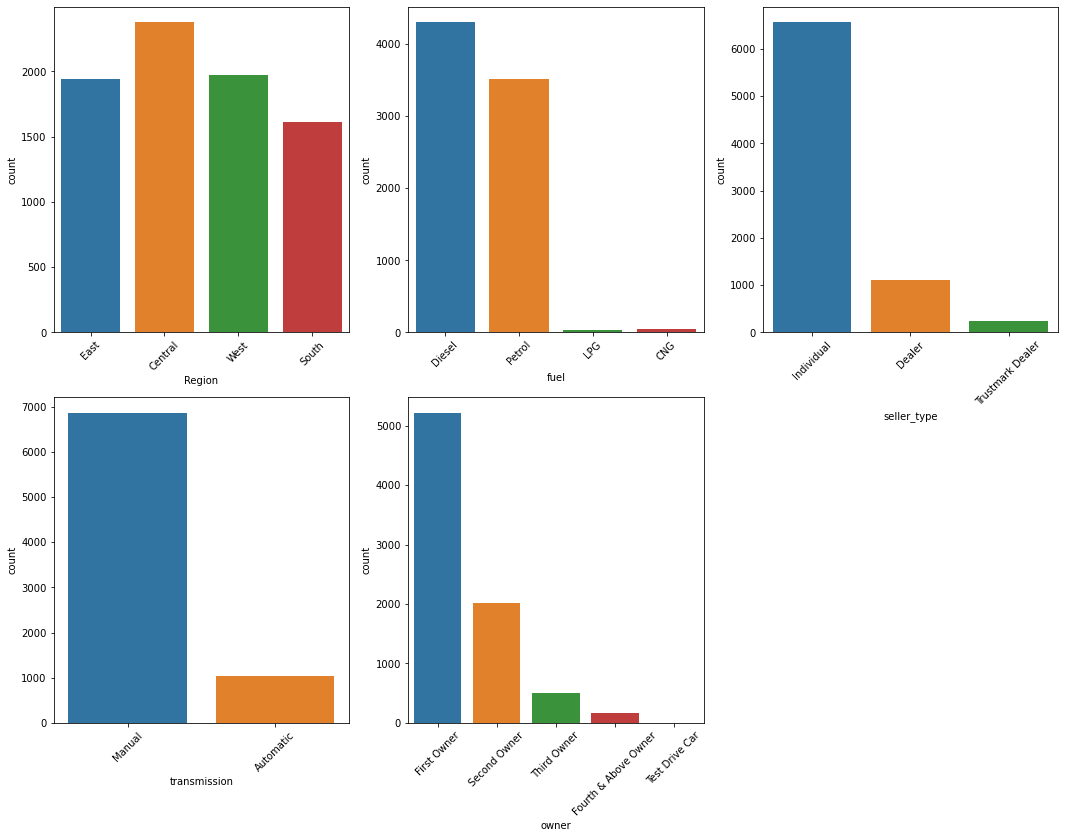

In [49]:
# Countplot for categorical variables

plt.figure(figsize=(18,85))
plot_num=1
for i in cat_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=45)
    plot_num+=1
plt.show()

### 
- In fuel type diesel & petrol are dominating
- In seller type--> maximum is in individual sub-category
- Manual transmission cars are in high number
- Owner type--> First_owner is dominating 

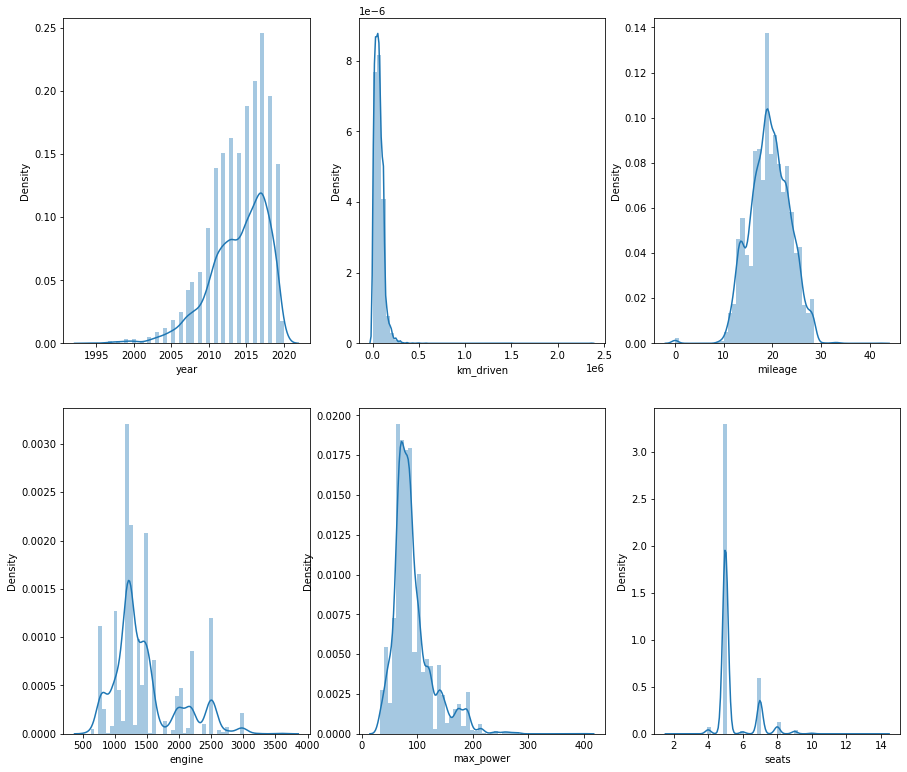

In [19]:
# Distplot for Numerical variables
plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(df[i])
    plot_num+=1
plt.show()

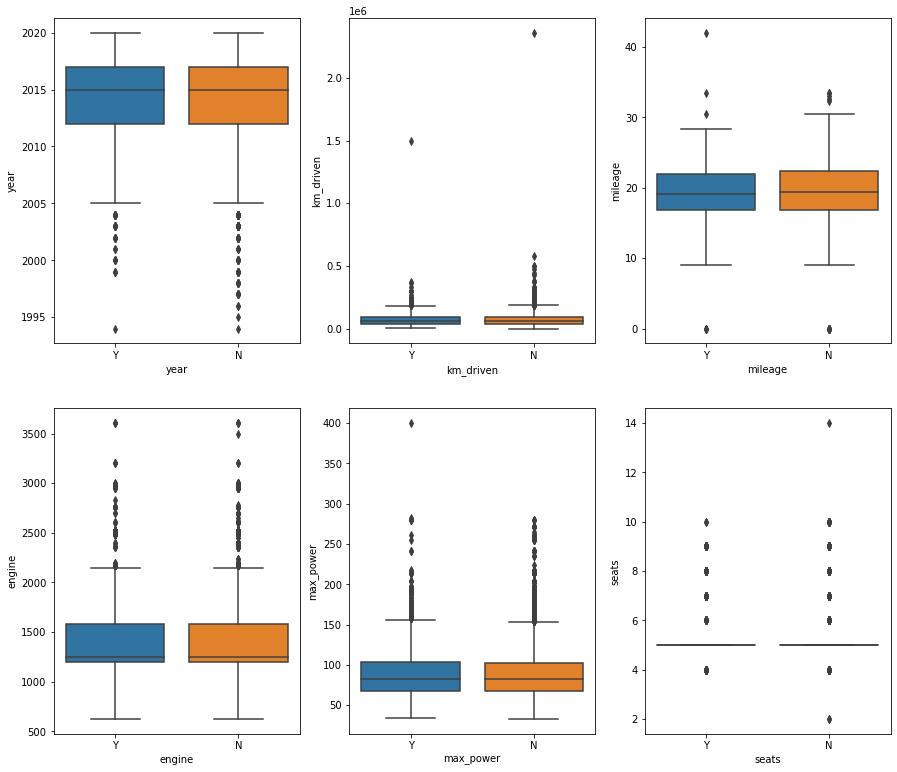

In [20]:
# Plotting boxplot of features with respect to target variable.
plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(x='sold',y=df[i],data=df)
    plt.xlabel(i)
    plot_num+=1
plt.show()

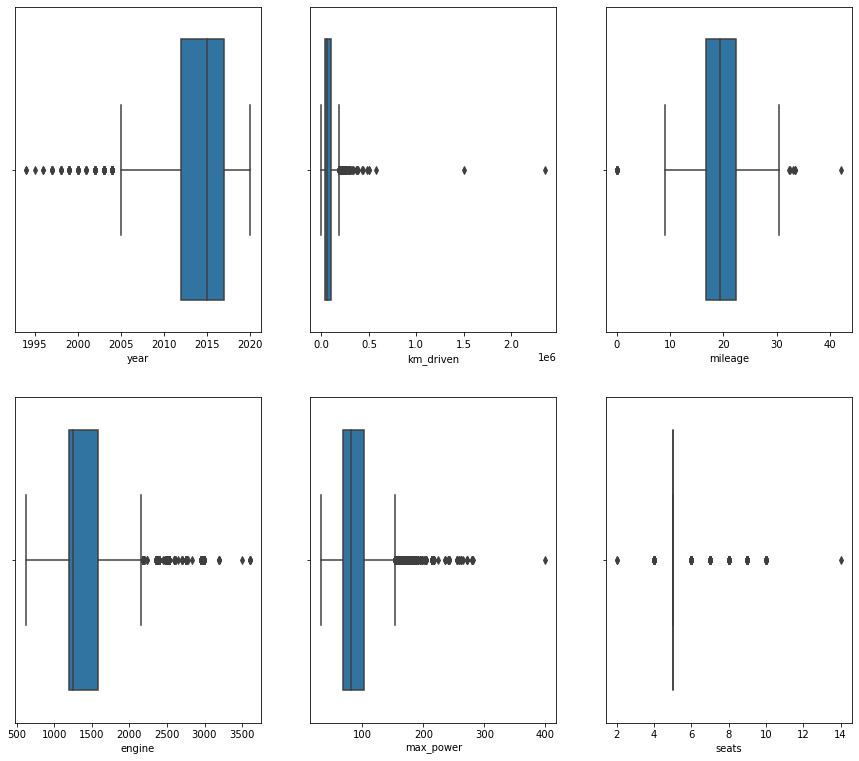

In [50]:
# Boxplot for outliers

plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plot_num+=1
plt.show()

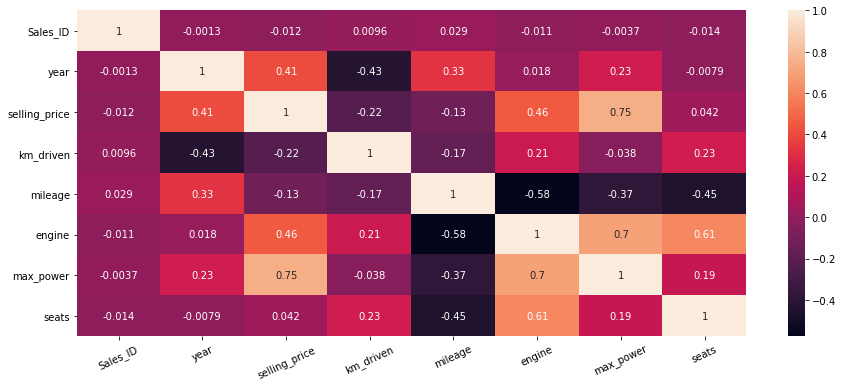

In [20]:
# Plotting heatmap to see the intensity of relation.
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=25)
plt.show()

In [21]:
df_num= df[['year','km_driven','mileage', 'engine', 'max_power', 'seats', 'selling_price']]
df_num.head()

,year,km_driven,mileage,engine,max_power,seats,selling_price
0,2014,145500,23.40,1248.0,74.00,5,450000
1,2014,120000,21.14,1498.0,103.52,5,370000
2,2006,140000,17.70,1497.0,78.00,5,158000
3,2010,127000,23.00,1396.0,90.00,5,225000
4,2007,120000,16.10,1298.0,88.20,5,130000


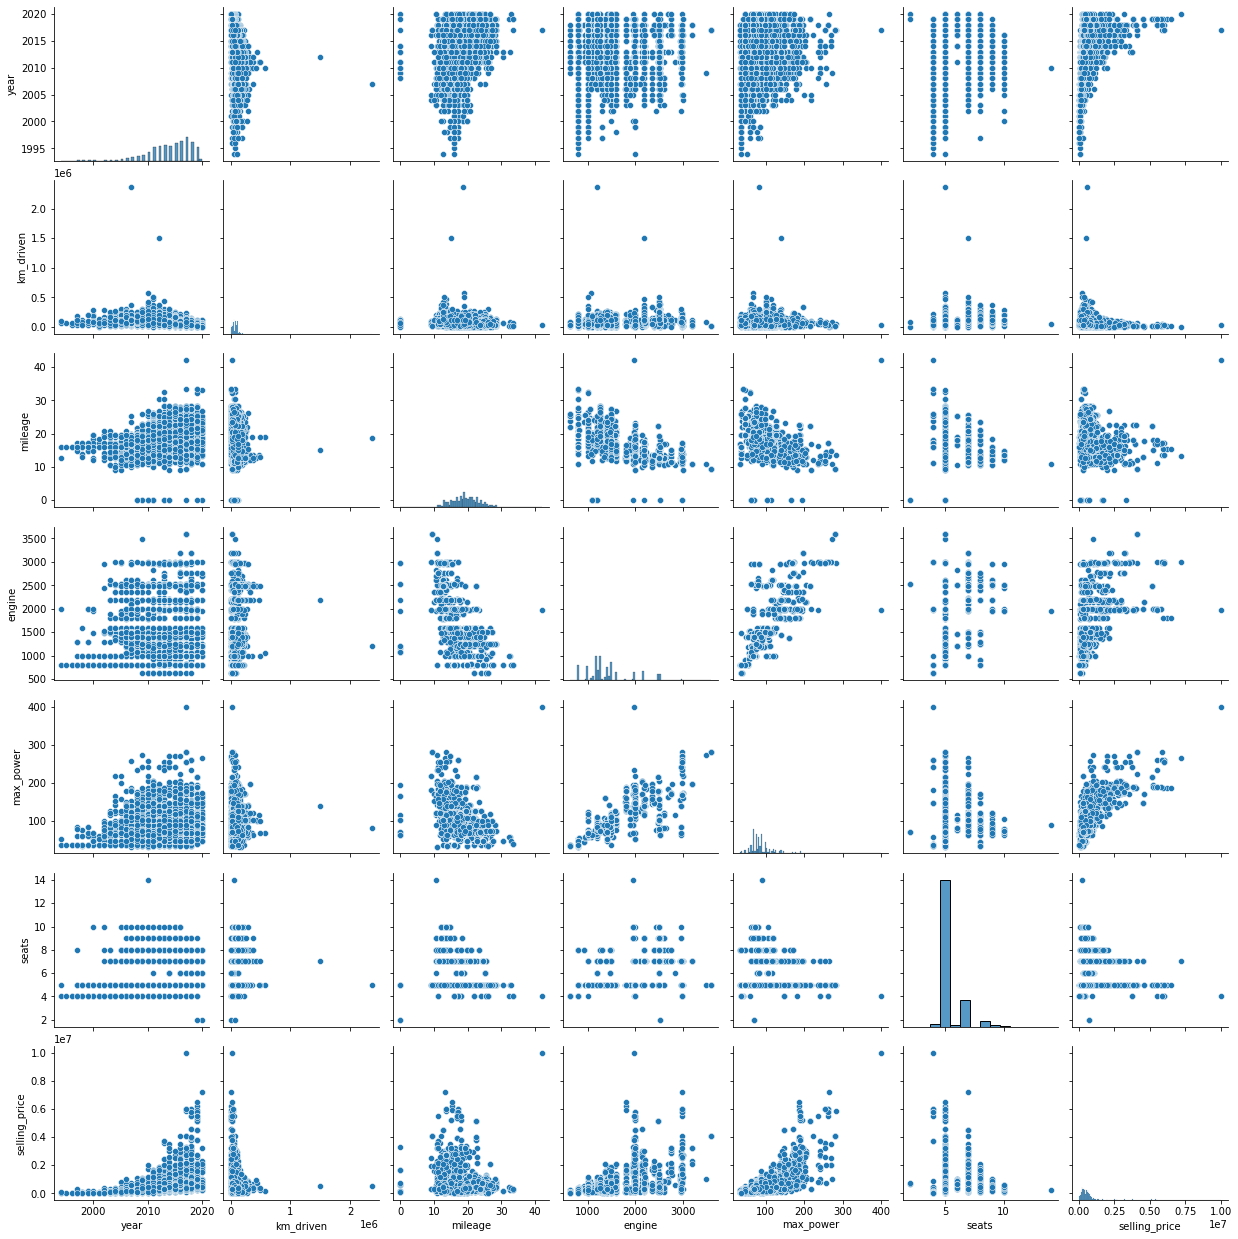

In [22]:
sns.pairplot(df_num)

In [143]:
car= df.copy()

In [24]:
data= df.copy()

In [25]:
def transformation(df,val):
    df[val+'_sqroot']=np.sqrt(df[val])
    df[val+'_square']=(df[val])**2
    if df[df[val]==0][val].count()==0:
        df[val+'_log']=np.log(df[val])      
            
    df[val+'_cuberoot']=np.cbrt(df[val])
    plt.figure(figsize=(18,10))
    plt.subplot(2,3,1)
    df[val].plot(kind='hist')
    plt.title('Original' + "-"+ val+ " Feature")
    plt.subplot(2,3,2)
    df[val+'_sqroot'].plot(kind='hist')
    plt.title('Sqroot'+ "-"+ val+ " Feature")
    plt.subplot(2,3,3)
    df[val+'_square'].plot(kind='hist')
    plt.title('Square'+ "-"+ val+ " Feature")
    
    if df[df[val]==0][val].count()==0:
        plt.subplot(2,3,4)
        df[val+'_log'].plot(kind='hist')
        plt.title('Log'+ "-"+ val+ " Feature")
            
    plt.subplot(2,3,5)
    df[val+'_cuberoot'].plot(kind='hist')
    plt.title('Cuberoot'+ "-"+ val+ " Feature")
    plt.show()

In [26]:
#No: of Outliers (IQR Method) function

def outlier_num(df,val):
    IQR = df[val].quantile(0.75) - df[val].quantile(0.25)
    upperlimit = df[val].quantile(0.75) + 1.5* IQR # q3 + 1.5IQR
    lowerlimit = df[val].quantile(0.25) - 1.5* IQR # q1- 1.5 IQR
    outliers = df[(df[val]<lowerlimit) | (df[val]> upperlimit)][val].count()
    return outliers

In [27]:
# Creating function to check for outliers 
def transformation_box(df,val):
    df[val+'_sqroot']=np.sqrt(df[val])
    df[val+'_square']=(df[val])**2
    df[val+'_log']=np.log(df[val])
    df[val+'_cuberoot']=np.cbrt(df[val])
    plt.figure(figsize=(18,10))
    plt.subplot(2,3,1)
    df[val].plot(kind='box')
    plt.title('Original'+ "-"+ val+ " Feature")
    plt.subplot(2,3,2)
    df[val+'_sqroot'].plot(kind='box')
    plt.title('Sqroot'+ "-"+ val+ " Feature")
    plt.subplot(2,3,3)
    df[val+'_square'].plot(kind='box')
    plt.title('Square'+ "-"+ val+ " Feature")
    plt.subplot(2,3,4)
    df[val+'_log'].plot(kind='box')
    plt.title('Log'+ "-"+ val+ " Feature")
    plt.subplot(2,3,5)
    df[val+'_cuberoot'].plot(kind='box')
    plt.title('Cuberoot'+ "-"+ val+ " Feature")
    plt.show()
    print("No: of outliers for Original ",val,":", outlier_num(df,val))
    print("No: of outliers for Sqroot ",val,":", outlier_num(df,val+'_sqroot'))
    print("No: of outliers for Square ",val,":", outlier_num(df,val+'_square'))
    print("No: of outliers for Log  ",val,":", outlier_num(df,val+'_log'))
    print("No: of outliers for Cuberoot ",val,":", outlier_num(df,val+'_cuberoot'))
    

In [28]:
num_cols

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

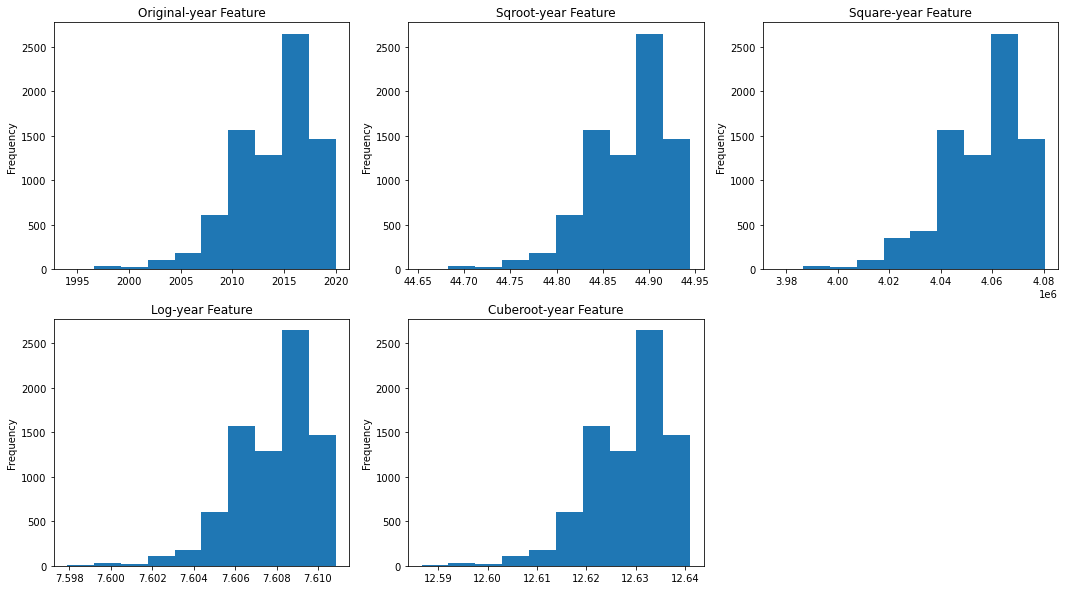

In [101]:
transformation(data,'year')

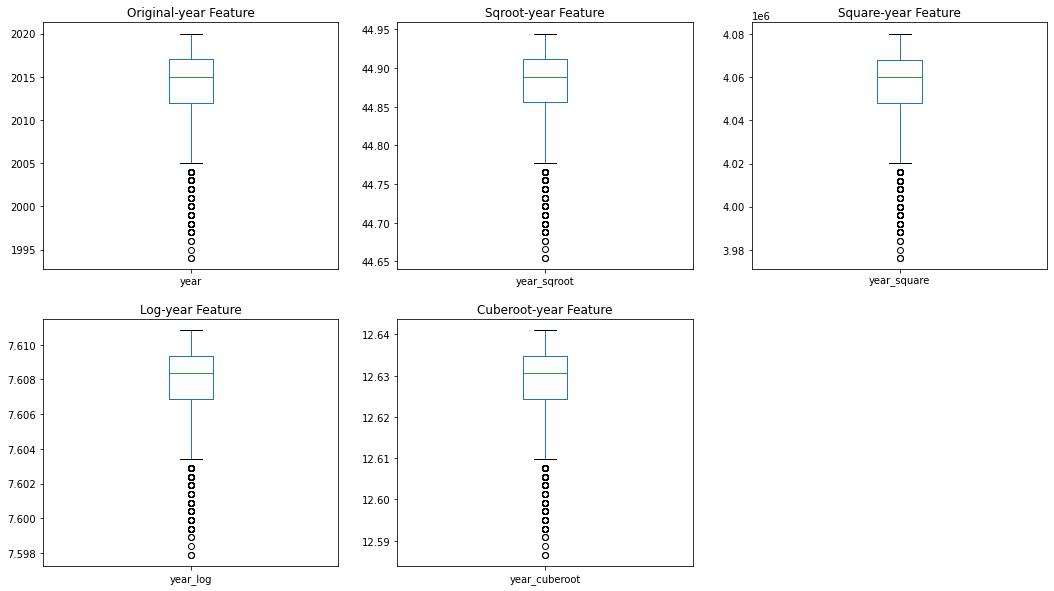

No: of outliers for Original  year : 165
No: of outliers for Sqroot  year : 165
No: of outliers for Square  year : 165
No: of outliers for Log   year : 165
No: of outliers for Cuberoot  year : 165


In [87]:
transformation_box(data,'year')

### Result: No transformation for "year" feature since there is no decrease in outlier numbers

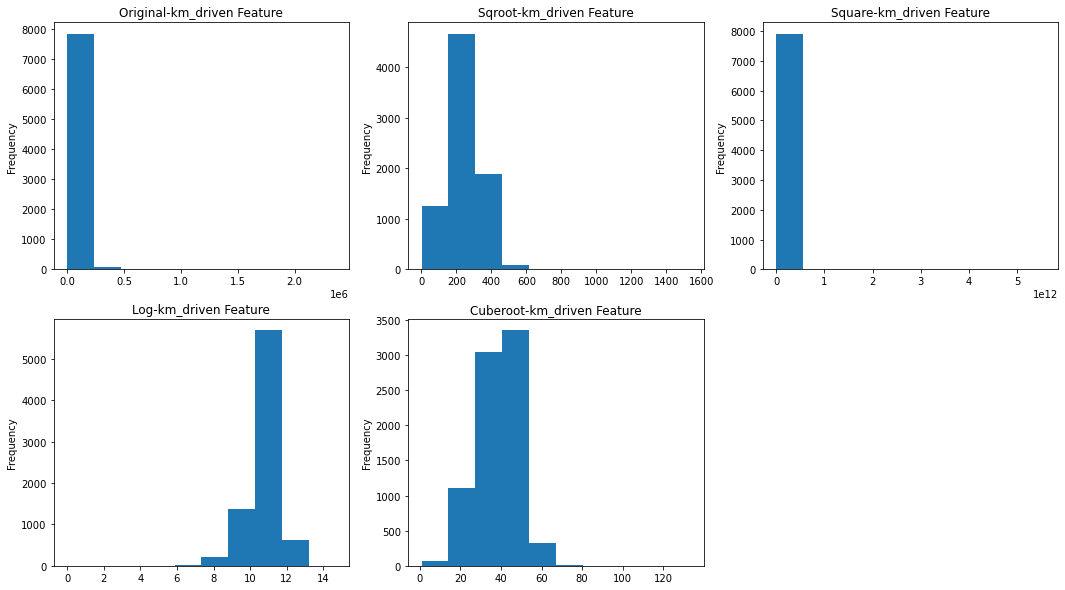

In [102]:
transformation(data,'km_driven')

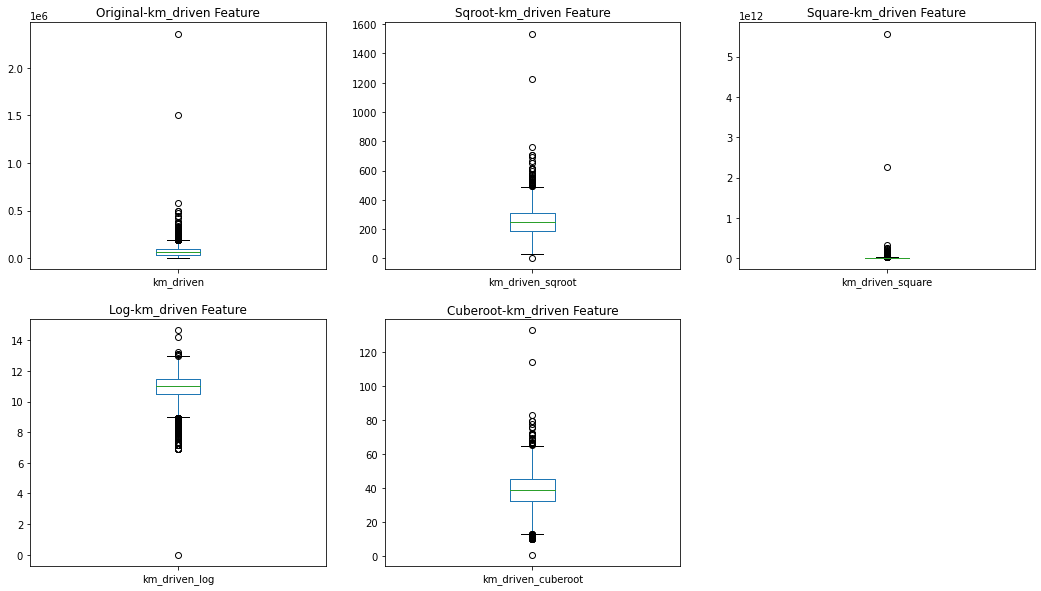

No: of outliers for Original  km_driven : 194
No: of outliers for Sqroot  km_driven : 67
No: of outliers for Square  km_driven : 455
No: of outliers for Log   km_driven : 335
No: of outliers for Cuberoot  km_driven : 90


In [89]:
transformation_box(data,'km_driven')

### Result: Select Sqroot transformation for 'km_driven' feature since outlier number decreases from 194 to 67

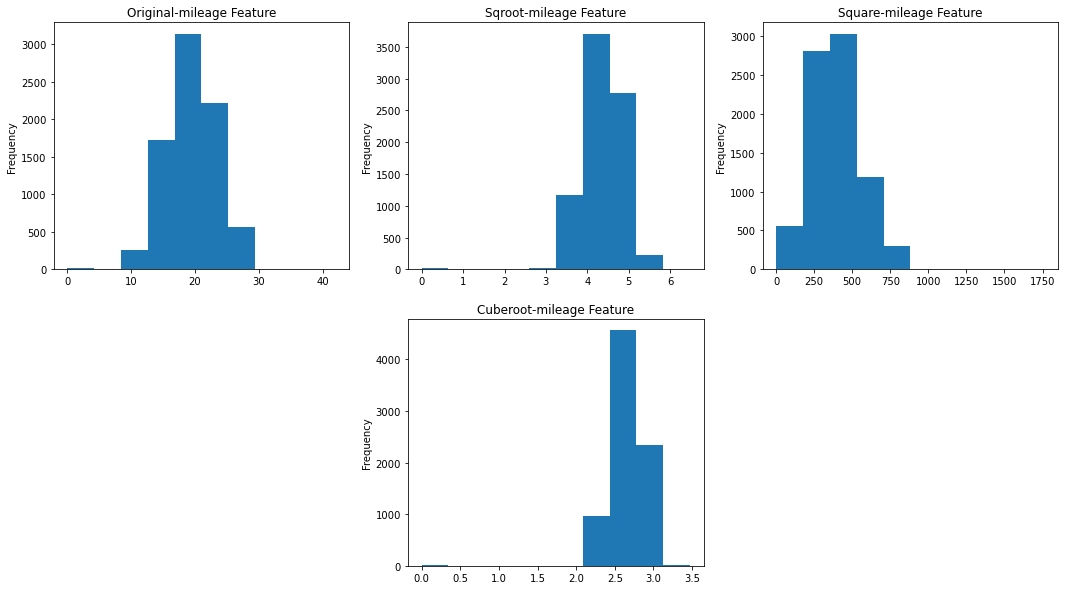

In [96]:
transformation(data,'mileage')

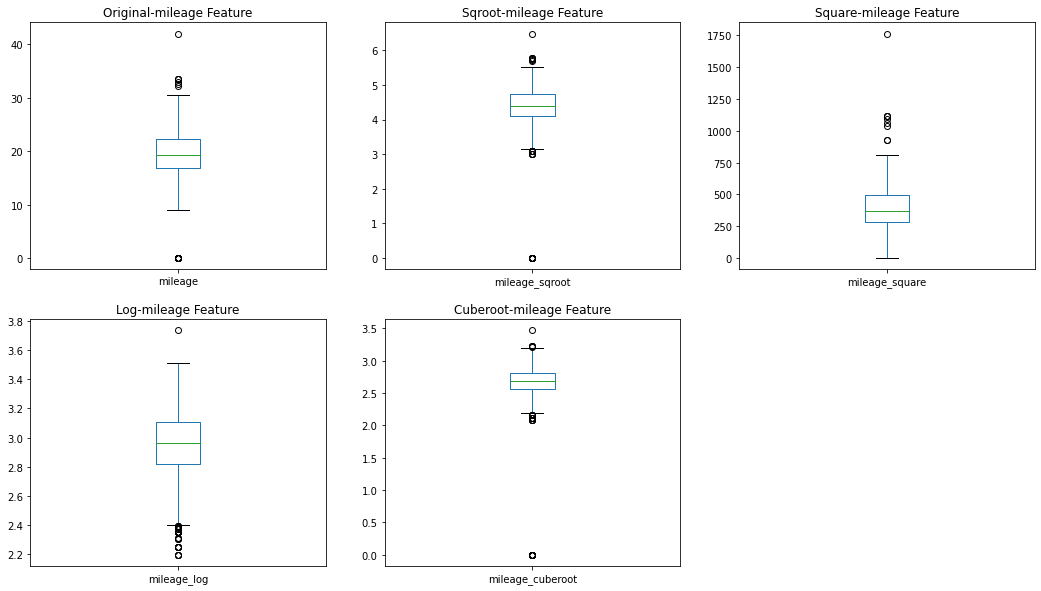

No: of outliers for Original  mileage : 24
No: of outliers for Sqroot  mileage : 34
No: of outliers for Square  mileage : 9
No: of outliers for Log   mileage : 65
No: of outliers for Cuberoot  mileage : 36


In [97]:
transformation_box(data,'mileage')

### Result: No transformation for 'mileage' feature since the original outliers are less

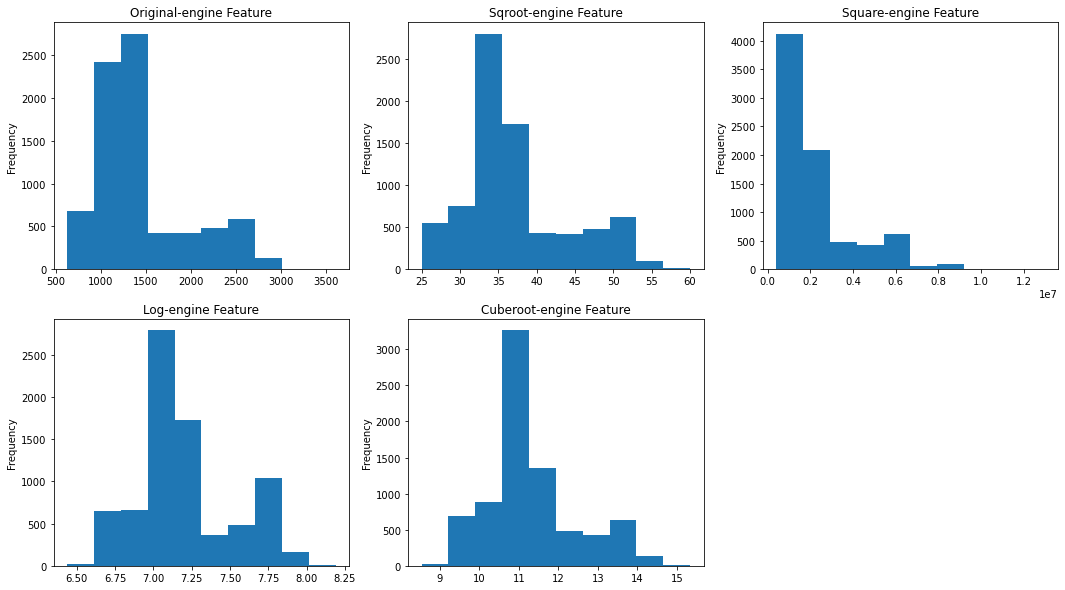

In [103]:
transformation(data,'engine')

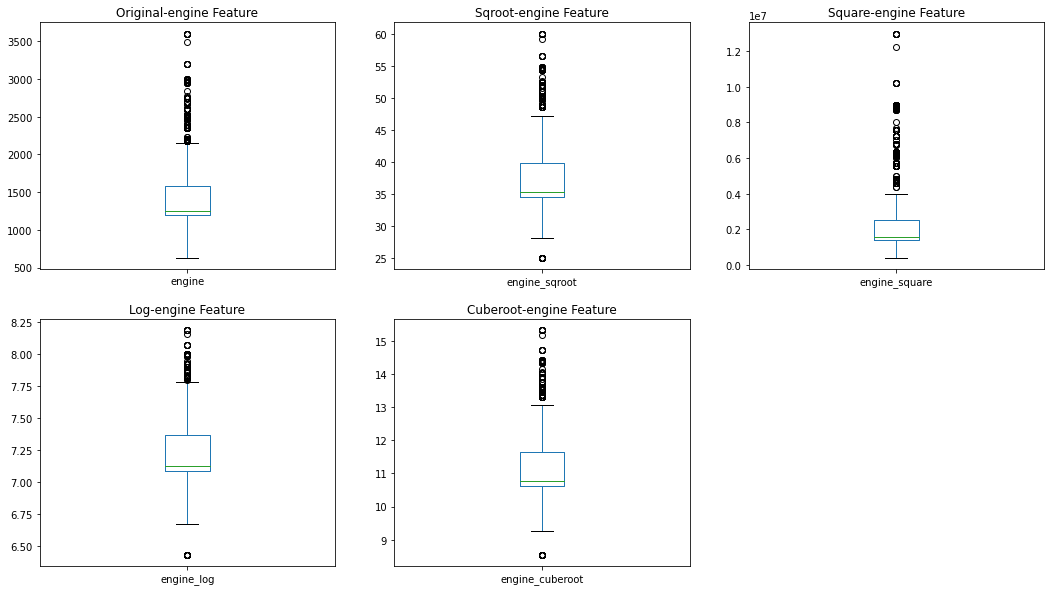

No: of outliers for Original  engine : 1183
No: of outliers for Sqroot  engine : 806
No: of outliers for Square  engine : 1213
No: of outliers for Log   engine : 760
No: of outliers for Cuberoot  engine : 806


In [104]:
transformation_box(data,'engine')

### Result: Select log transformation for 'engine' feature since outlier number decreases from 1183 to 760

In [105]:
data.shape

(7906, 33)

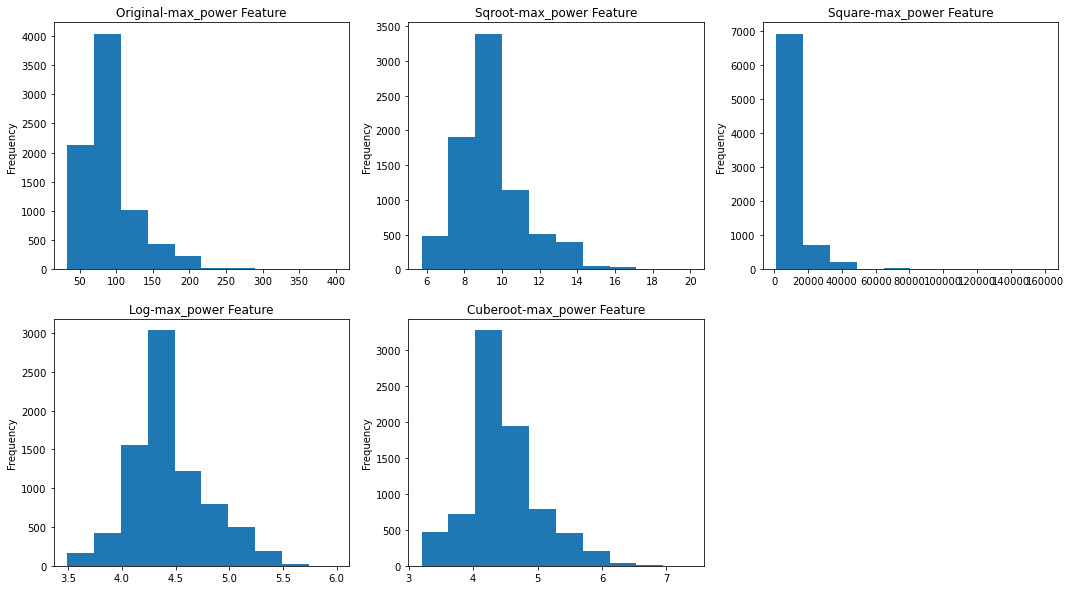

In [106]:
transformation(data,'max_power')

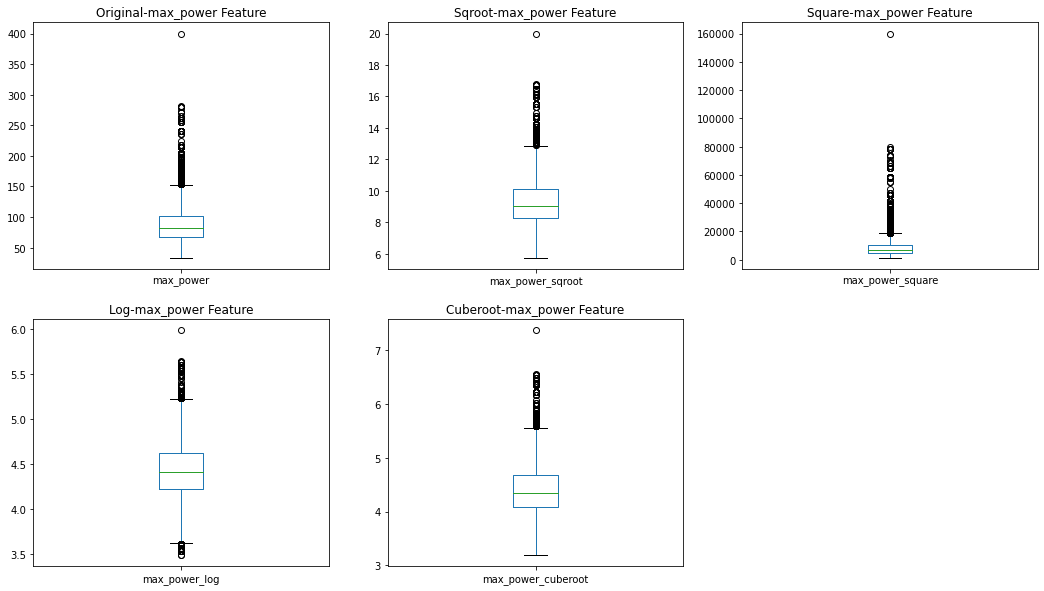

No: of outliers for Original  max_power : 564
No: of outliers for Sqroot  max_power : 477
No: of outliers for Square  max_power : 927
No: of outliers for Log   max_power : 392
No: of outliers for Cuberoot  max_power : 390


In [107]:
transformation_box(data,'max_power')

### Result: Select log transformation for 'max_power' feature since outlier number decreases from 564 to 392

In [108]:
data.shape

(7906, 37)

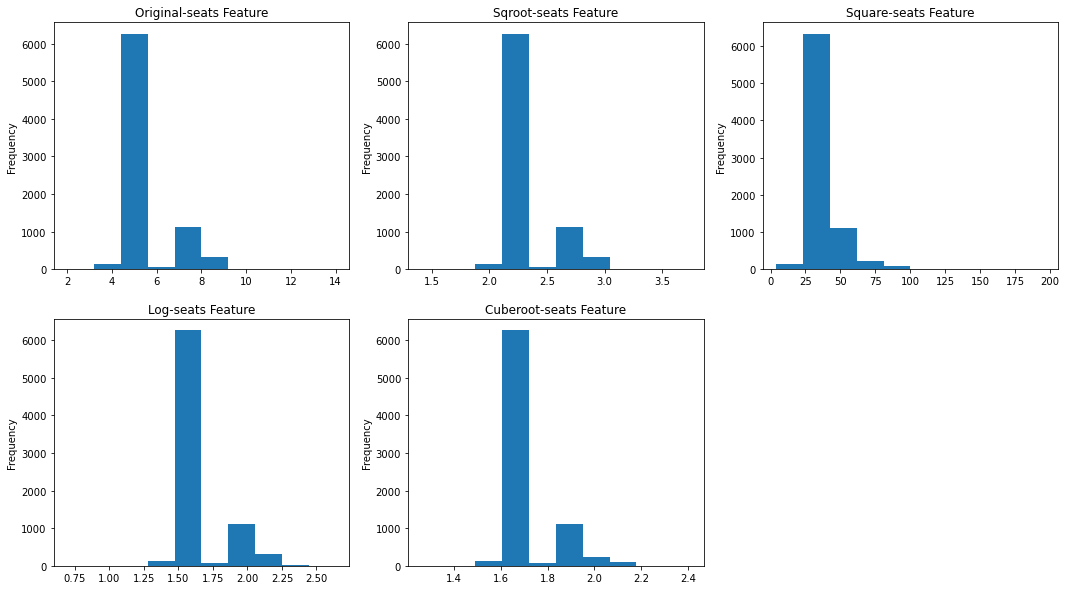

In [109]:
transformation(data,'seats')

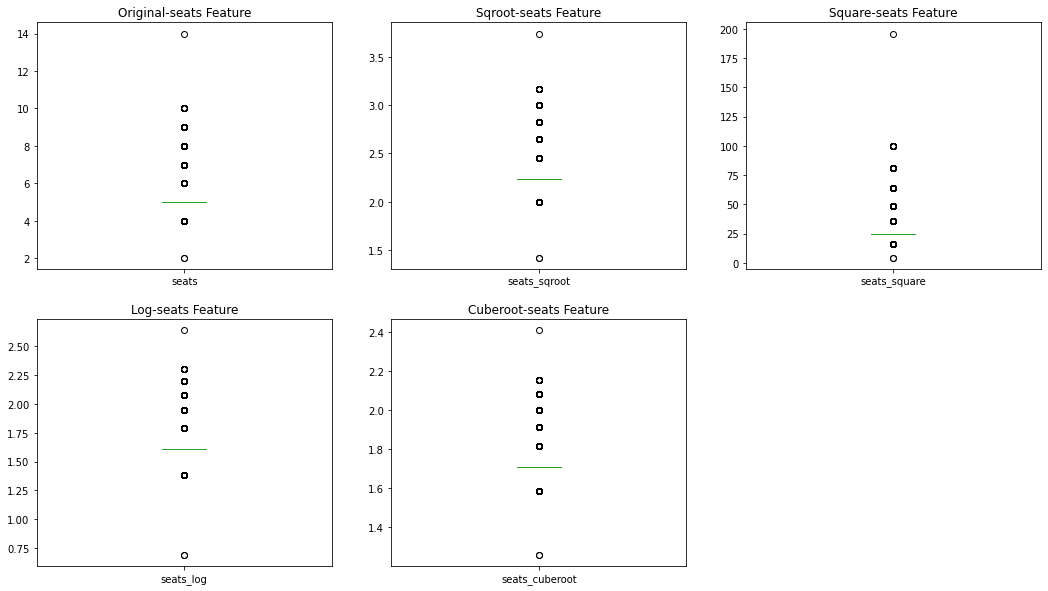

No: of outliers for Original  seats : 1652
No: of outliers for Sqroot  seats : 1652
No: of outliers for Square  seats : 1652
No: of outliers for Log   seats : 1652
No: of outliers for Cuberoot  seats : 1652


In [110]:
transformation_box(data,'seats')

### Result: No transformation for 'seats' feature since outlier number remains same

In [144]:
# Feature trasnformation

car['km_driven_Sqroot'] = np.sqrt(car['km_driven'])
car['Engine_Log'] = np.log(car['engine'])
car['Max_power_Log'] = np.log(car['max_power'])

In [145]:
car.head(2)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,km_driven_Sqroot,Engine_Log,Max_power_Log
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Y,381.444622,7.129298,4.304065
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Y,346.410162,7.311886,4.639765


In [146]:
car.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'sold',
       'km_driven_Sqroot', 'Engine_Log', 'Max_power_Log'],
      dtype='object')

In [147]:
X= car[['year','km_driven_Sqroot', 'Engine_Log', 'Max_power_Log', 'mileage' , 'seats', 'Region', 'fuel', 'seller_type', 'transmission', 'owner']]
X.head()

,year,km_driven_Sqroot,Engine_Log,Max_power_Log,mileage,seats,Region,fuel,seller_type,transmission,owner
0,2014,381.444622,7.129298,4.304065,23.40,5,East,Diesel,Individual,Manual,First Owner
1,2014,346.410162,7.311886,4.639765,21.14,5,East,Diesel,Individual,Manual,Second Owner
2,2006,374.165739,7.311218,4.356709,17.70,5,Central,Petrol,Individual,Manual,Third Owner
3,2010,356.370594,7.241366,4.499810,23.00,5,Central,Diesel,Individual,Manual,First Owner
4,2007,346.410162,7.168580,4.479607,16.10,5,East,Petrol,Individual,Manual,First Owner


In [148]:
X.shape

(7906, 11)

In [150]:
y = car['selling_price']
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

### Encoding (One hot encoding used)

In [151]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,year,km_driven_Sqroot,Engine_Log,Max_power_Log,mileage,seats,Region_East,Region_South,Region_West,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,381.444622,7.129298,4.304065,23.40,5,1,0,0,1,0,0,1,0,1,0,0,0,0
1,2014,346.410162,7.311886,4.639765,21.14,5,1,0,0,1,0,0,1,0,1,0,1,0,0
2,2006,374.165739,7.311218,4.356709,17.70,5,0,0,0,0,0,1,1,0,1,0,0,0,1
3,2010,356.370594,7.241366,4.499810,23.00,5,0,0,0,1,0,0,1,0,1,0,0,0,0
4,2007,346.410162,7.168580,4.479607,16.10,5,1,0,0,0,0,1,1,0,1,0,0,0,0


In [152]:
#Scaling using Standard scaler (used)

sc= StandardScaler()

for i in X.columns:
    X[i]= sc.fit_transform(X[i].values.reshape(-1,1))

In [153]:
X.head()

,year,km_driven_Sqroot,Engine_Log,Max_power_Log,mileage,seats,Region_East,Region_South,Region_West,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.004158,1.464505,-0.321711,-0.424542,0.986157,-0.434128,1.754240,-0.506671,-0.577253,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,-0.143721,-0.585043,-0.025156,-0.262595
1,0.004158,1.084780,0.249608,0.533243,0.426198,-0.434128,1.754240,-0.506671,-0.577253,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,-0.143721,1.709277,-0.025156,-0.262595
2,-2.066530,1.385612,0.247519,-0.274344,-0.426129,-0.434128,-0.570047,-0.506671,-0.577253,-1.091718,-0.066684,1.116254,0.452363,-0.175412,0.389408,-0.143721,-0.585043,-0.025156,3.808144
3,-1.031186,1.192737,0.028952,0.133937,0.887050,-0.434128,-0.570047,-0.506671,-0.577253,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,-0.143721,-0.585043,-0.025156,-0.262595
4,-1.807694,1.084780,-0.198797,0.076297,-0.822561,-0.434128,1.754240,-0.506671,-0.577253,-1.091718,-0.066684,1.116254,0.452363,-0.175412,0.389408,-0.143721,-0.585043,-0.025156,-0.262595


In [154]:
X.shape

(7906, 19)

In [155]:
y.shape

(7906,)

## 1) Linear Regression for predicting selling price

In [156]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=10)

In [157]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (6324, 19)
x_test shape:  (1582, 19)
y_train shape:  (6324,)
y_test shape:  (1582,)


In [158]:
lr = LinearRegression()

In [159]:
model_skl= lr.fit(x_train,y_train)

In [160]:
pred_y = model_skl.predict(x_test)
pred_y

array([ 304878.54996576, -651457.3997459 , 1077082.61630017, ...,
        587611.22010006,  786595.54805798,  121430.03304572])

In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [162]:
mean_absolute_error(y_test, pred_y)

299540.0607174824

In [163]:
mean_squared_error(y_test, pred_y)

295749210789.4007

In [164]:
r2_score(y_test, pred_y)

0.5956024235559618

In [165]:
model_skl.score(x_test, y_test)

0.5956024235559618

### Linear Regression Assumptions Testing

In [171]:
dfn= car[['year','km_driven_Sqroot', 'Engine_Log', 'Max_power_Log', 'mileage' , 'seats', 'Region', 'fuel', 'seller_type', 'transmission', 'owner','selling_price']]
dfn.head(2)

,year,km_driven_Sqroot,Engine_Log,Max_power_Log,mileage,seats,Region,fuel,seller_type,transmission,owner,selling_price
0,2014,381.444622,7.129298,4.304065,23.40,5,East,Diesel,Individual,Manual,First Owner,450000
1,2014,346.410162,7.311886,4.639765,21.14,5,East,Diesel,Individual,Manual,Second Owner,370000


In [172]:
model1= ols('selling_price~year+km_driven_Sqroot+ Engine_Log+ Max_power_Log+ mileage+ seats' , data = dfn).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     1488.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:51:54   Log-Likelihood:            -1.1582e+05
No. Observations:                7906   AIC:                         2.317e+05
Df Residuals:                    7899   BIC:                         2.317e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -7.34e+07   4.66e+06    -15.740      0.000   -8.25e+07   -6.43e+07
year                3.3e+04   2344.863     14.074      0.000    2.84e+04    3.76e+04
km_driven_Sqroot -1844.6692     88.811    -20.771      0.000   -2018.763   -1670.575
Engine_Log        4.809e+05   4.24e+04     11.329      0.000    3.98e+05    5.64e+05
Max_power_Log     1.139e+06   3.28e+04     34.713      0.000    1.07e+06     1.2e+06
mileage           1759.6019   2183.174      0.806      0.420   -2519.996    6039.200
seats            -1.016e+05   9171.692    -11.073      0.000    -1.2e+05   -8.36e+04
==============================================================================
Omnibus:                     5733.144   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116979.515
Skew:                           3.293   Prob(JB):                         0.00
Kurtosis:                      20.656   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
from statsmodels.stats.diagnostic import linear_rainbow

In [176]:
linear_rainbow(model1) # test stat= 1.09, p value= 0.003

(1.0908160097739292, 0.0031591580497063753)

## Assumptions testing Results

1. Normality test:  JB test & Omnibus--> p value=0 is less than 0.05, therefore errors does not follow normal distribution

2. Auto correlation: Durbin-Watson value is 1.505 indicating Positive auto correlation

3. Multi collinearity: Cond. No value is above 1000--> indicating very high multi-collinearity

4. Linearity : Rain bow test--> p value (0.003) <0.05 --> non-linear


## 1b) Lasso Regression

In [178]:
from sklearn.linear_model  import Lasso
from sklearn.linear_model  import Ridge

In [180]:
las_model= Lasso(alpha=0.2)
las_model.fit(x_train,y_train)

Lasso(alpha=0.2)

In [181]:
print("lasso mode: ", las_model.coef_)

lasso mode:  [ 117048.54992195 -114534.26186081   76248.10516845  281370.12566014
  -14693.58590505  -56005.08482141    1861.11564622   18061.95692693
   -2084.69533918    4185.84163151    8903.18124039  -76058.11438871
 -102465.91545581  -77897.85768979 -222543.84450291    4395.37054955
  -12839.69290541   56448.3130095    -3560.59690684]


In [182]:
las_model.score(x_test,y_test)

0.5956024239385506

In [183]:
pred_y_las= las_model.predict(x_test)
mean_squared_error(y_test,pred_y_las)

295749210509.60095

## 1c) LassoCV

In [185]:
from sklearn.linear_model import LassoCV

In [186]:
lascv_model= LassoCV(eps= 0.01, n_alphas=100)
lascv_model.fit(x_train,y_train)

LassoCV(eps=0.01)

In [187]:
print("lasso cv mode: ", lascv_model.coef_)

lasso cv mode:  [ 108567.41160127 -111257.93241202   66011.00494033  291780.43270317
      -0.          -38239.58499596       0.           13064.33561331
      -0.               0.            3869.59222033  -70105.62102778
  -98255.90911526  -70216.82215047 -222923.89833949       0.
   -8841.11412332   52823.99149071      -0.        ]


In [189]:
pred_y_lascv= lascv_model.predict(x_test)
mean_squared_error(y_test,pred_y_lascv)

295666225411.2372

In [190]:
lascv_model.score(x_test,y_test)

0.5957158949857588

### Result: There is no improvement in model score for Lasso, but for Lasso CV model, the score slightly improved

## 1d)  Ridge model

In [191]:
rid_model= Ridge(alpha=0.3)
rid_model.fit(x_train,y_train)

Ridge(alpha=0.3)

In [192]:
print("rid model coeff: ", rid_model.coef_)

rid model coeff:  [ 117049.83013959 -114532.13732089   76270.05554849  281343.19003209
  -14691.33968248  -56008.30083352    1859.72526051   18060.65628973
   -2085.76896935    4322.03168694    8920.52880299  -75918.05111028
 -102463.69398774  -77893.47690236 -222539.51244939    4394.23784403
  -12842.38629774   56447.3041307    -3562.62625596]


In [194]:
pred_y_rid= rid_model.predict(x_test)
mean_squared_error(y_test,pred_y_rid)

295750817539.07245

In [193]:
print("rid model R2: ", rid_model.score(x_test, y_test))

rid model R2:  0.5956002265402149


## 1 e) Ridge CV

In [195]:
from sklearn.linear_model import RidgeCV

In [196]:
ridcv_model= RidgeCV(alphas=(0.1, 1,10)) 
ridcv_model.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [197]:
pred_y_ridcv= ridcv_model.predict(x_test)

In [198]:
print("rid cv model coeff: ", ridcv_model.coef_)

rid cv model coeff:  [ 117076.39829262 -114460.65826243   76948.34497994  280498.69991092
  -14606.07437284  -56086.27319642    1807.33207694   18011.14002526
   -2118.494958      8436.87682056    9436.43445682  -71673.97710424
 -102387.51768336  -77740.85372657 -222399.76020786    4348.90611485
  -12925.87839821   56410.16633539   -3623.63235815]


In [200]:
mean_squared_error(y_test,pred_y_ridcv)

295802032465.88684

In [199]:
print("rid cv model R2: ", ridcv_model.score(x_test, y_test))

rid cv model R2:  0.5955301969627016


### Result: There is no improvement in score using Ridge method

## 2) Logistic Regression for predicting sold or not

In [13]:
sold = df.copy()

In [14]:
sold.head(2)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Y


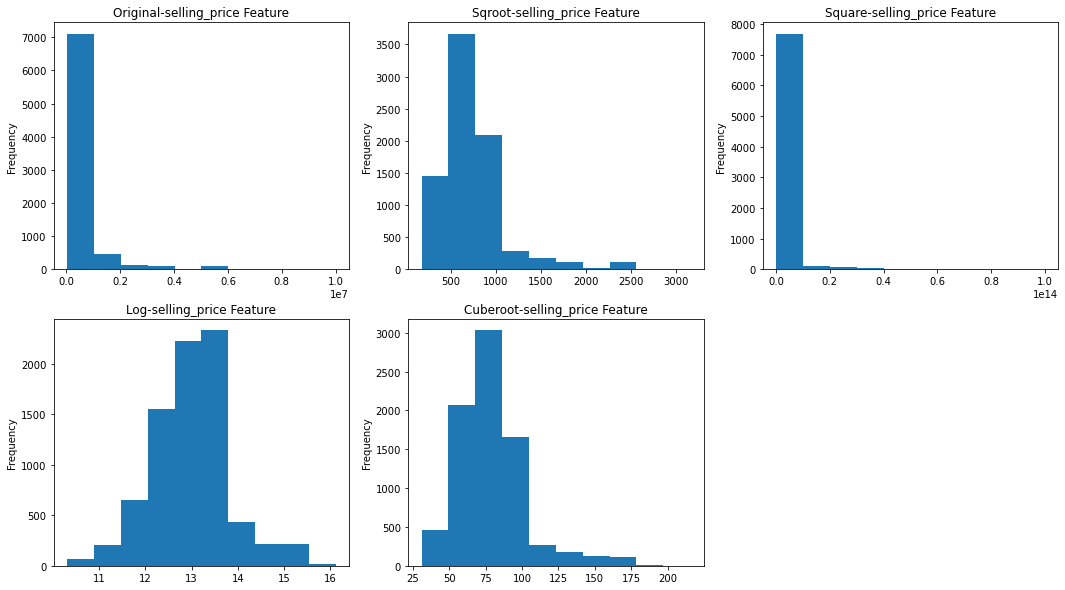

In [76]:
transformation(data,'selling_price')

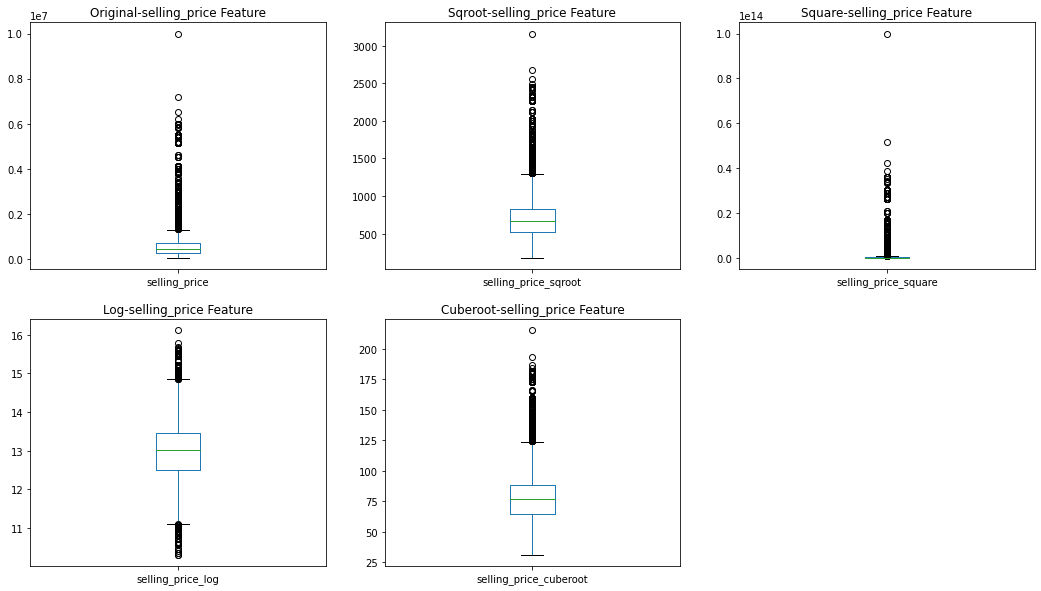

No: of outliers for Original  selling_price : 598
No: of outliers for Sqroot  selling_price : 472
No: of outliers for Square  selling_price : 804
No: of outliers for Log   selling_price : 377
No: of outliers for Cuberoot  selling_price : 412


In [77]:
transformation_box(data,'selling_price')

### Result: Apply log transformation for "selling price" feature since it reduces outliers from 598 to 377

In [15]:
# Feature trasnformation

sold['km_driven_Sqroot'] = np.sqrt(sold['km_driven'])
sold['Engine_Log'] = np.log(sold['engine'])
sold['Max_power_Log'] = np.log(sold['max_power'])
sold['selling_price_Log'] = np.log(sold['selling_price'])

In [16]:
sold.head(1)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,...,owner,mileage,engine,max_power,seats,sold,km_driven_Sqroot,Engine_Log,Max_power_Log,selling_price_Log
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,...,First Owner,23.4,1248.0,74.0,5,Y,381.444622,7.129298,4.304065,13.017003


In [205]:
sold.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'sold',
       'km_driven_Sqroot', 'Engine_Log', 'Max_power_Log', 'selling_price_Log'],
      dtype='object')

In [17]:
X1= sold[['year','km_driven_Sqroot', 'Engine_Log', 'Max_power_Log','selling_price_Log', 'mileage' , 'seats', 'Region', 'fuel', 'seller_type', 'transmission', 'owner']]
X1.head()

,year,km_driven_Sqroot,Engine_Log,Max_power_Log,selling_price_Log,mileage,seats,Region,fuel,seller_type,transmission,owner
0,2014,381.444622,7.129298,4.304065,13.017003,23.40,5,East,Diesel,Individual,Manual,First Owner
1,2014,346.410162,7.311886,4.639765,12.821258,21.14,5,East,Diesel,Individual,Manual,Second Owner
2,2006,374.165739,7.311218,4.356709,11.970350,17.70,5,Central,Petrol,Individual,Manual,Third Owner
3,2010,356.370594,7.241366,4.499810,12.323856,23.00,5,Central,Diesel,Individual,Manual,First Owner
4,2007,346.410162,7.168580,4.479607,11.775290,16.10,5,East,Petrol,Individual,Manual,First Owner


In [18]:
X1.shape

(7906, 12)

In [19]:
y1 = sold['sold']
y1.shape

(7906,)

In [20]:
y1.value_counts()

N    5906
Y    2000
Name: sold, dtype: int64

In [21]:
y1= y1.replace({'Y': 1, 'N':0})

In [22]:
y1.value_counts()

0    5906
1    2000
Name: sold, dtype: int64

### Encoding (One hot encoding used)

In [23]:
X1 = pd.get_dummies(X1,drop_first=True)
X1.head()

,year,km_driven_Sqroot,Engine_Log,Max_power_Log,selling_price_Log,mileage,seats,Region_East,Region_South,Region_West,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,381.444622,7.129298,4.304065,13.017003,23.40,5,1,0,0,1,0,0,1,0,1,0,0,0,0
1,2014,346.410162,7.311886,4.639765,12.821258,21.14,5,1,0,0,1,0,0,1,0,1,0,1,0,0
2,2006,374.165739,7.311218,4.356709,11.970350,17.70,5,0,0,0,0,0,1,1,0,1,0,0,0,1
3,2010,356.370594,7.241366,4.499810,12.323856,23.00,5,0,0,0,1,0,0,1,0,1,0,0,0,0
4,2007,346.410162,7.168580,4.479607,11.775290,16.10,5,1,0,0,0,0,1,1,0,1,0,0,0,0


In [25]:
#Scaling using Standard scaler (used)

sc= StandardScaler()

for i in X1.columns:
    X1[i]= sc.fit_transform(X1[i].values.reshape(-1,1))

In [26]:
X1.head()

,year,km_driven_Sqroot,Engine_Log,Max_power_Log,selling_price_Log,mileage,seats,Region_East,Region_South,Region_West,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.004158,1.464505,-0.321711,-0.424542,0.021525,0.986157,-0.434128,1.754240,-0.506671,-0.577253,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,-0.143721,-0.585043,-0.025156,-0.262595
1,0.004158,1.084780,0.249608,0.533243,-0.215005,0.426198,-0.434128,1.754240,-0.506671,-0.577253,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,-0.143721,1.709277,-0.025156,-0.262595
2,-2.066530,1.385612,0.247519,-0.274344,-1.243209,-0.426129,-0.434128,-0.570047,-0.506671,-0.577253,-1.091718,-0.066684,1.116254,0.452363,-0.175412,0.389408,-0.143721,-0.585043,-0.025156,3.808144
3,-1.031186,1.192737,0.028952,0.133937,-0.816047,0.887050,-0.434128,-0.570047,-0.506671,-0.577253,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,-0.143721,-0.585043,-0.025156,-0.262595
4,-1.807694,1.084780,-0.198797,0.076297,-1.478913,-0.822561,-0.434128,1.754240,-0.506671,-0.577253,-1.091718,-0.066684,1.116254,0.452363,-0.175412,0.389408,-0.143721,-0.585043,-0.025156,-0.262595


In [27]:
xtrain,xtest,ytrain,ytest= train_test_split(X1,y1, test_size=0.2,random_state=10)

In [28]:
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (6324, 20)
xtest shape:  (1582, 20)
ytrain shape:  (6324,)
ytest shape:  (1582,)


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model= LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

In [31]:
prob_pred_y1 = log_model.predict_proba(xtest)
prob_pred_y1

array([[0.76618211, 0.23381789],
       [0.69613762, 0.30386238],
       [0.67927841, 0.32072159],
       ...,
       [0.81322544, 0.18677456],
       [0.64192421, 0.35807579],
       [0.64699693, 0.35300307]])

In [32]:
pred_y1 = log_model.predict(xtest)
pred_y1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,auc,cohen_kappa_score,classification_report


In [34]:
accuracy_score(ytest,pred_y1)

0.7364096080910241

In [35]:
recall_score(ytest,pred_y1)

0.0

In [36]:
precision_score(ytest,pred_y1)

0.0

In [37]:
f1_score(ytest,pred_y1)

0.0

In [38]:
print(classification_report(ytest,pred_y1))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1165
           1       0.00      0.00      0.00       417

    accuracy                           0.74      1582
   macro avg       0.37      0.50      0.42      1582
weighted avg       0.54      0.74      0.62      1582



In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
roc_auc_score(ytest,pred_y1)

0.5

In [41]:
from sklearn.metrics import plot_confusion_matrix

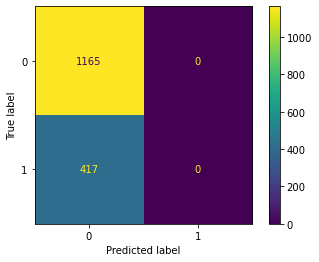

In [42]:
plot_confusion_matrix(log_model, xtest, ytest)

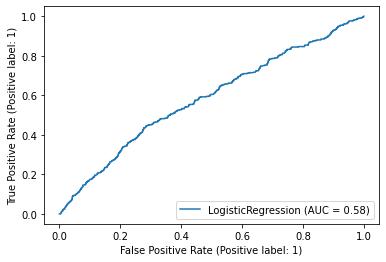

In [43]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model, xtest, ytest)

## 2b) Applying SMOTE for balancing the data ( Logistic Regression)

In [244]:
from imblearn.over_sampling import SMOTE

In [245]:
sm = SMOTE(random_state=10)

In [246]:
# Before smote
print(f'Count of minority class records before upsampling: {xtrain[ytrain==1].shape[0]}')
print(f'Count of existing Majority class records: {xtrain[ytrain==0].shape[0]}')

Count of minority class records before upsampling: 1583
Count of existing Majority class records: 4741


In [247]:
xtrain_smote, ytrain_smote = sm.fit_resample(xtrain,ytrain)

In [248]:
# After smote
print(f'Count of minority class(class 1) records after SMOTE : {xtrain_smote[ytrain_smote==1].shape[0]}')
print(f'Count of existing Majority class(class 0) records: {xtrain_smote[ytrain_smote==0].shape[0]}')

Count of minority class(class 1) records after SMOTE : 4741
Count of existing Majority class(class 0) records: 4741


In [249]:
ytrain_smote.value_counts()

0    4741
1    4741
Name: sold, dtype: int64

In [250]:
log_model2= LogisticRegression()
log_model2.fit(xtrain_smote, ytrain_smote)

LogisticRegression()

In [252]:
prob_pred_y2 = log_model2.predict_proba(xtest)
prob_pred_y2

array([[0.50552459, 0.49447541],
       [0.44578745, 0.55421255],
       [0.40708038, 0.59291962],
       ...,
       [0.57912301, 0.42087699],
       [0.38934105, 0.61065895],
       [0.38284802, 0.61715198]])

In [253]:
pred_y2 = log_model2.predict(xtest)
pred_y2

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [230]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,auc,cohen_kappa_score,classification_report


In [254]:
accuracy_score(ytest,pred_y2)

0.5758533501896334

In [255]:
recall_score(ytest,pred_y2)

0.5275779376498801

In [256]:
precision_score(ytest,pred_y2)

0.3170028818443804

In [257]:
f1_score(ytest,pred_y2)

0.39603960396039606

In [258]:
print(classification_report(ytest,pred_y2))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67      1165
           1       0.32      0.53      0.40       417

    accuracy                           0.58      1582
   macro avg       0.55      0.56      0.53      1582
weighted avg       0.66      0.58      0.60      1582



In [239]:
from sklearn.metrics import roc_auc_score

In [259]:
roc_auc_score(ytest,pred_y2)

0.5603554924300903

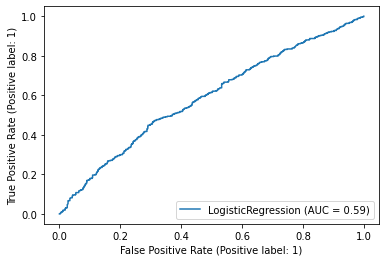

In [261]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model2, xtest, ytest)

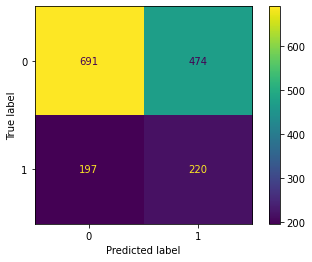

In [262]:
plot_confusion_matrix(log_model2, xtest, ytest)

## Getting better results for logistic regression after implementing SMOTE 